In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import json

[nltk_data] Downloading package stopwords to /Users/tommy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [3]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [4]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in range(1,1164946)])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    #print(data.headline_text.unique())
    return X, text

In [5]:
data, raw_text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [6]:
data

['nrl panthers warriors broncos roosters scorecentre',
 'nrl responds to jack de belin verdict',
 'nurse sentenced to community service over botched breast surgery',
 'olympic cyclist jack bobridge found guilty of drug dealing',
 'one hour workers one hour employment jobs unemployment',
 'one punch attacker sentenced over act caught on',
 'one punch attacker sentenced to five years',
 'paul keating reflects hawke era reforms',
 'people who own guns illegally cause the gun crime',
 'perth father admits sleepover sexual abuse child porn stash',
 'perth glory set for a league grand final against sydney fc',
 'pic of the week',
 'planet america 17 may',
 'police smash goznym cybercrime network that stole $140 million',
 'public service cuts labor liberal costings',
 'rugby australia terminates israel folau contract',
 'rwandan massacre victim family kept in dark on resettlement',
 'sa paedophile ruecha tokputza jailed for 40 years',
 'senior victorian police accused of anti gay harassment'

In [7]:
raw_text

array(['nrl panthers warriors broncos roosters scorecentre',
       'nrl responds to jack de belin verdict',
       'nurse sentenced to community service over botched breast surgery',
       ...,
       'what victorias coronavirus restrictions mean for new years eve',
       'whats life like as an american doctor during covid',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [8]:
type(data)

list

In [9]:
type(raw_text)

numpy.ndarray

In [10]:
print(len(data))
print(len(raw_text))

61313
59969


In [11]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
text = []
for sentence in raw_text:
    text.append(" ".join([lem.lemmatize(i) for i in sentence.split()]))

In [12]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

'\ndata = []\nfor i in range(50000):\n    data.append(X[i])\n'

In [13]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

'\nprint(type(text))\nprint(len(data))\nprint(len(text))\n'

In [14]:
"""
#df1 = pd.DataFrame({'document':data})
df = pnl_data.DataFrame({'document':text})
"""

"\n#df1 = pd.DataFrame({'document':data})\ndf = pnl_data.DataFrame({'document':text})\n"

In [15]:
"""
# removing everything except alphabets`
#df1['clean_doc'] = df1['document'].str.replace("[^a-zA-Z#]", " ")
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")
"""

'\n# removing everything except alphabets`\n#df1[\'clean_doc\'] = df1[\'document\'].str.replace("[^a-zA-Z#]", " ")\ndf[\'clean_doc\'] = df[\'document\'].str.replace("[^a-zA-Z#]", " ")\n'

In [16]:
"""
# removing short words
#df1['clean_doc'] = df1['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
"""

"\n# removing short words\n#df1['clean_doc'] = df1['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))\ndf['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))\n"

In [17]:
"""
df
"""

'\ndf\n'

In [18]:
stop_words = stopwords.words('english')

In [19]:
"""
# tokenization
#tokenized_doc1 = df1['clean_doc'].apply(lambda x: x.split())
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())
"""

"\n# tokenization\n#tokenized_doc1 = df1['clean_doc'].apply(lambda x: x.split())\ntokenized_doc = df['clean_doc'].apply(lambda x: x.split())\n"

In [20]:
"""
tokenized_doc
"""

'\ntokenized_doc\n'

In [21]:
"""
# remove stop-words
#tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)
"""

'\n# remove stop-words\n#tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])\ntokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])\nprint(tokenized_doc)\n'

In [22]:
"""
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)
"""

"\n# de-tokenization\ndetokenized_doc = []\nfor i in range(len(tokenized_doc)):\n    if i in tokenized_doc:\n        t = ' '.join(tokenized_doc[i])\n        detokenized_doc.append(t)\nprint(detokenized_doc)\n"

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
# tf-idf (term frequency-inverse document frequency)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5)
tfidf_matrix = tfidf_vectorizer.fit_transform(text)
tfidf_words = tfidf_vectorizer.get_feature_names()

# bag of words (term frequency)
tf_vectorizer = CountVectorizer(stop_words=stop_words, max_df = 0.5)
tf_matrix = tf_vectorizer.fit_transform(text)
tf_words = tf_vectorizer.get_feature_names()

tfidf_matrix.shape, tf_matrix.shape

((59969, 27792), (59969, 27792))

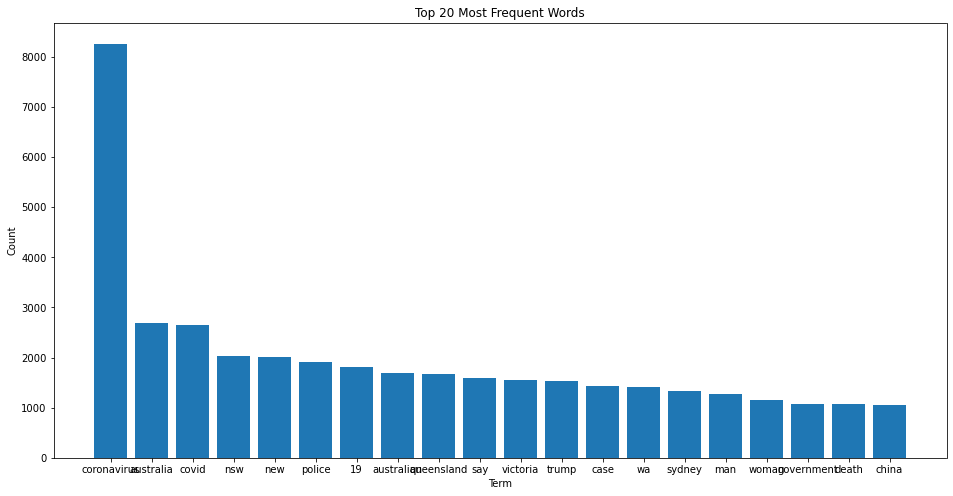

In [25]:
# get word frequencies from the bag of words and sort them by count in descending order
term_frequency = [(term, tf_matrix.sum(axis=0)[0, i]) for term, i in tf_vectorizer.vocabulary_.items()]
term_frequency = sorted(term_frequency, key = lambda x: x[1], reverse=True)
terms = [i[0] for i in term_frequency[:20]] # get top 20 words
count = [i[1] for i in term_frequency[:20]] # get counts of top 20 words

# plot the 20 most frequent words in a bar chart
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(terms)), count)
ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms)
ax.set_title('Top 20 Most Frequent Words')
ax.set_xlabel('Term')
ax.set_ylabel('Count')
plt.savefig('Top 20 Most Frequent Words.png', dpi=200)
plt.show()

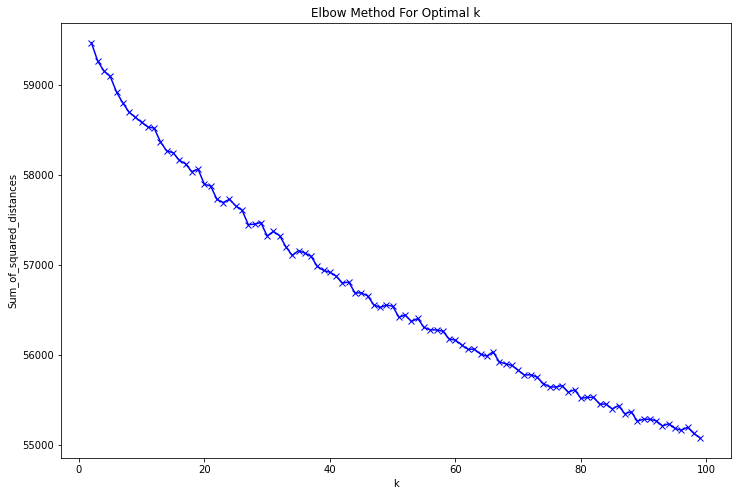

value of K: 
34


In [26]:
Sum_of_squared_distances = []
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(12,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('value of K: ')
true_k = int(input())

In [27]:
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model_matrix = model.fit(tfidf_matrix)
model_centroids = model.cluster_centers_.argsort()[:, ::-1]

labels=model.labels_.tolist()
#clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

#for i in range(true_k):
#    print(clusters[clusters['cluster'] == i])

In [28]:
clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

                                                   title  cluster
0         nrl panther warrior bronco rooster scorecentre        0
31897                           foxtels uncertain future        0
31896           for some athlete the shutdown ha meant a        0
31892                        drone footage of west basin        0
31891    davenport aboriginal community defends lockdown        0
...                                                  ...      ...
33760                 bill shorten on centrelink closure       33
33758  australian community medium closure esperance ...       33
33748  abc regional queensland poll show support for ...       33
25798  indonesia volcano mount merapi erupts forcing ...       33
28707  coronavirus border closure queensland nsw cool...       33

[59969 rows x 2 columns]
                                                   title  cluster
0         nrl panther warrior bronco rooster scorecentre        0
1                  nrl responds to jack de belin v

In [29]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(true_k)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
km_lsa = KMeans(true_k).fit(lsa_matrix) # LSA-based k-means
lsa_labels=km_lsa.labels_.tolist()

In [30]:
lsa_clusters=pnl_data.DataFrame(list(zip(text,lsa_labels)),columns=['title','cluster'])
print(lsa_clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(lsa_clusters[lsa_clusters['cluster'] == i])

                                                   title  cluster
49586  queensland health minister steven mile ppe dis...        0
51555  survey of healthcare worker mental health issu...        0
20047  health document reveal dozen of case of patien...        0
31925  muslim health worker ramadan treating coronavi...        0
31862  cancer patient angelo romero health insurance ...        0
...                                                  ...      ...
19192  jetstar strike cause flight cancellation aroun...       33
33742  wha pass coronavirus investigation australia w...       33
27514  brendan murphy say australia must live differe...       33
19260  call for escooter law to be relaxed across aus...       33
46995  abc china correspondent bill birtles arrives b...       33

[59969 rows x 2 columns]
                                                   title  cluster
265                 screen time impact vision eye health        0
358              sa health discontinues wch teethi

In [37]:
def top_words_cluster(model_name, centers):
    ''' prints the top 20 words of each cluster
        from the centroids of the k-means models '''
    print(model_name)
    for i in range(true_k):
        print("Cluster %d: " % i, end="")
        print(" ".join([tfidf_words[c] for c in centers[i, :10]]))
    print()

In [38]:
top_words_cluster(" ---K-M---", model_centroids)

 ---K-M---
Cluster 0: wa woman government year sydney election china world interview win
Cluster 1: police officer man arrest shooting nsw nt protester investigate search
Cluster 2: 19 covid coronavirus case australia victoria live vaccine news new
Cluster 3: new zealand case coronavirus nsw australia record york restriction wa
Cluster 4: australia coronavirus south china covid19 update live world cricket cup
Cluster 5: afl final grand richmond geelong season collingwood beat player coast
Cluster 6: call coronavirus health action support phone government prompt police morrison
Cluster 7: court death supreme high george appeal federal told hears face
Cluster 8: coronavirus restriction pandemic lockdown case covid19 update wa quarantine health
Cluster 9: man adelaide one school charged plus dy arrested student year
Cluster 10: nsw coronavirus case bushfires restriction premier sydney government coast gladys
Cluster 11: melbourne coronavirus lockdown storm cup victoria sydney police nrl r

In [39]:
top_words_cluster(" ---LSA-KM---", lsa.inverse_transform(km_lsa.cluster_centers_).argsort()[:, ::-1])

 ---LSA-KM---
Cluster 0: health mental coronavirus minister royal worker commission man say south
Cluster 1: woman world cup state australia cricket found melbourne charged final
Cluster 2: case coronavirus new nsw record rise queensland one covid 19
Cluster 3: coronavirus pandemic lockdown covid19 update amid tasmania school nt vaccine
Cluster 4: year bushfire tasmania school one news day two crash family
Cluster 5: melbourne lockdown sydney afl final coronavirus nrl cup win beat
Cluster 6: say andrew premier daniel home minister change lockdown climate china
Cluster 7: nsw sydney bushfire border coronavirus fire bushfires premier berejiklian home
Cluster 8: wa border coronavirus woman say year bushfire premier perth update
Cluster 9: trump donald biden joe election impeachment president coronavirus say update
Cluster 10: police officer man nt arrest nsw shooting car investigate crash
Cluster 11: australian open china south coronavirus home change two bushfires overseas
Cluster 12: co

In [34]:
clusters.to_csv('clusters_result.csv', index=False)
lsa_clusters.to_csv('lsa_clusters_result.csv', index=False)

In [35]:
#https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8
#https://stats.stackexchange.com/questions/87950/distortion-function-for-k-means-algorithm

In [36]:
#https://nbviewer.org/github/domreichl/blog-post-clustering/blob/master/blog_post_clustering.ipynb